## Creating an ANN using PyTorch

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df["Outcome_str"] = np.where(df.Outcome, "Diabetic", "Non Diabetic")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_str
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic


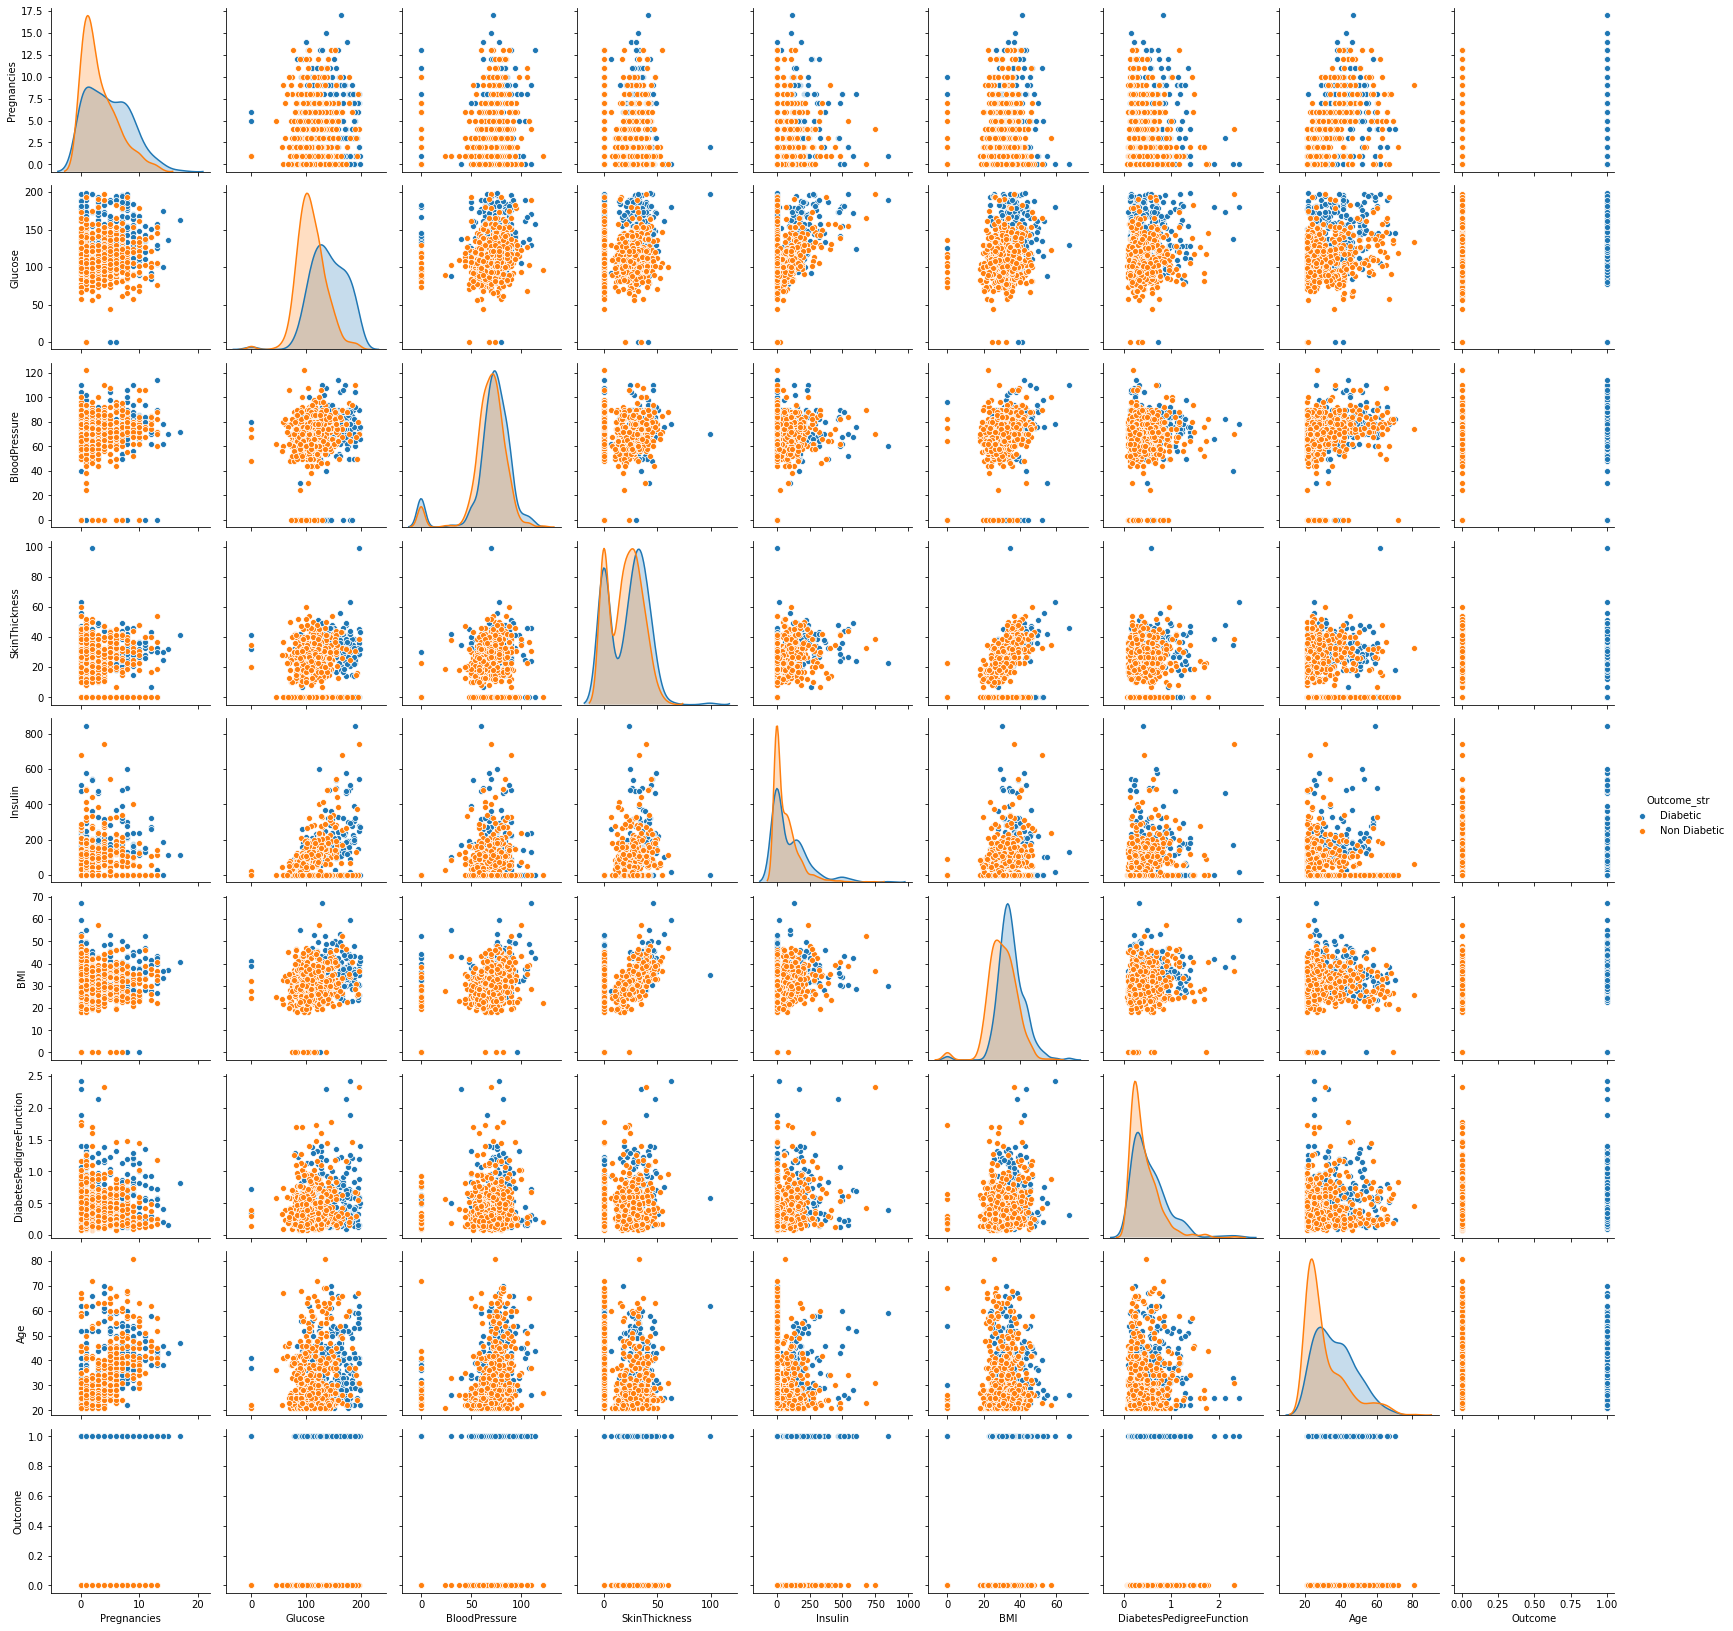

In [5]:
sns.pairplot(df, hue="Outcome_str")
plt.show()

In [6]:
X = df.drop(['Outcome', "Outcome_str"], axis=1).values
y = df.Outcome.values
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [7]:
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train.shape, X_test.shape

((691, 8), (77, 8))

In [9]:
X_train[0]

array([  5.   , 158.   ,  84.   ,  41.   , 210.   ,  39.4  ,   0.395,
        29.   ])

In [10]:
X_test[0]

array([ 1.   , 79.   , 60.   , 42.   , 48.   , 43.5  ,  0.678, 23.   ])

In [11]:
torch.FloatTensor(X_train[0]), torch.FloatTensor(X_test[0])

(tensor([  5.0000, 158.0000,  84.0000,  41.0000, 210.0000,  39.4000,   0.3950,
          29.0000]),
 tensor([ 1.0000, 79.0000, 60.0000, 42.0000, 48.0000, 43.5000,  0.6780, 23.0000]))

In [12]:
### Creating Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
### Creating Model using Torch
class ANN_Model(nn.Module):
    
    def __init__(self, input_features=8, hidden1=32, hidden2=32, out_features=2):
        super().__init__()
        
        ### Fully COnnected Layers
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        
        ### Output layers
        self.out = nn.Linear(hidden2, out_features)
    
    ### Forward Propagation
    def forward(self, x):
        x = f.relu(self.f_connected1(x))
        x = f.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [14]:
torch.manual_seed(20)
model = ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)>

In [16]:
### Backward Propagation: Defining Loss Function, Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
print(loss_function)
print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)


In [18]:
epochs = 500
final_losses = list()
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    
    if i%10 == 1:
        print("Epoch Number: {} and Loss is: {}".format(i, loss.item()))
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and Loss is: 1.5180609226226807
Epoch Number: 11 and Loss is: 0.8047692179679871
Epoch Number: 21 and Loss is: 0.6782482266426086
Epoch Number: 31 and Loss is: 0.6018447279930115
Epoch Number: 41 and Loss is: 0.5722702145576477
Epoch Number: 51 and Loss is: 0.5590770840644836
Epoch Number: 61 and Loss is: 0.5509584546089172
Epoch Number: 71 and Loss is: 0.5422365665435791
Epoch Number: 81 and Loss is: 0.5356913208961487
Epoch Number: 91 and Loss is: 0.5293277502059937
Epoch Number: 101 and Loss is: 0.5227056741714478
Epoch Number: 111 and Loss is: 0.5163727402687073
Epoch Number: 121 and Loss is: 0.5096890330314636
Epoch Number: 131 and Loss is: 0.5031378269195557
Epoch Number: 141 and Loss is: 0.49651679396629333
Epoch Number: 151 and Loss is: 0.4899505376815796
Epoch Number: 161 and Loss is: 0.48414915800094604
Epoch Number: 171 and Loss is: 0.48347121477127075
Epoch Number: 181 and Loss is: 0.4793379306793213
Epoch Number: 191 and Loss is: 0.47062796354293823
Epoch N

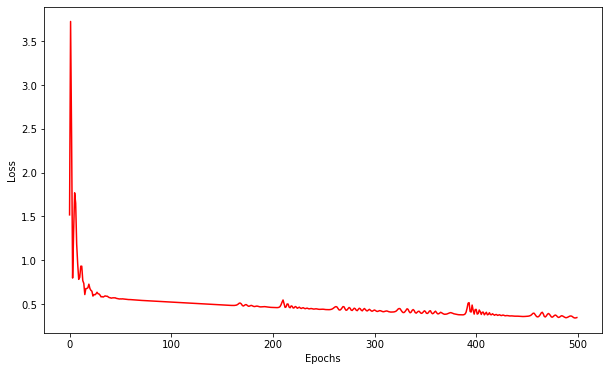

In [19]:
### Plot loss Function
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), final_losses, color='r')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

In [20]:
### Prediction in X_test data
predictions = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
predictions[:10]    

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0]

In [21]:
y_test[:10]

tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

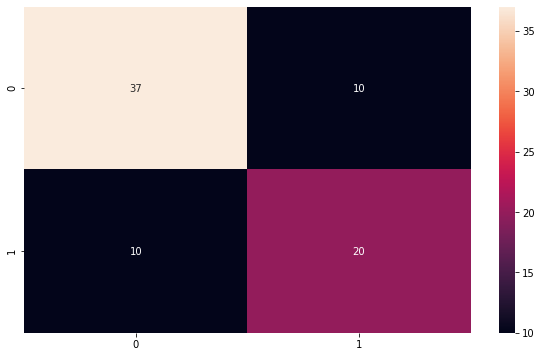

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)
plt.show()

In [23]:
accuracy_score(predictions, y_test)

0.7402597402597403

In [24]:
torch.save(model, "Models/diabetes.pt")

In [25]:
model = torch.load('Models/diabetes.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)

In [26]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6, 148, 72, 35, 0, 33.6, 0.627, 50, 1]

In [27]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [28]:
new_data=torch.tensor(lst1)
new_data

tensor([  6.0000, 130.0000,  72.0000,  40.0000,   0.0000,  25.6000,   0.6270,
         45.0000])

In [29]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([-0.5805, -0.0568])
1


In [30]:
#### New Data
lst1=[6.0, 130.0, 42.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data=torch.tensor(lst1)
new_data

tensor([  6.0000, 130.0000,  42.0000,  40.0000,   0.0000,  25.6000,   0.6270,
         45.0000])

In [31]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([ 0.9939, -0.4564])
0
